In [1]:
!git clone https://github.com/ML-DATAMIND/ML_DATAMIND

Cloning into 'ML_DATAMIND'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 104 (delta 42), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (104/104), 6.39 MiB | 8.59 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [2]:
import numpy as np

In [3]:
# load preprocessed data
data_path = '/content/ML_DATAMIND'

x_train = np.load(data_path + '/Dataset/X_train_bin.npy')
y_train = np.load(data_path + '/Dataset/y_train_bin.npy')
x_test = np.load(data_path + '/Dataset/X_test_bin.npy')
y_test = np.load(data_path + '/Dataset/y_test_bin.npy')

In [4]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (16500, 25)
y_train shape: (16500,)
x_test shape: (5500, 25)
y_test shape: (5500,)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# predict and print evaluation metrics
prediction = rf.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report:\n{classification_report(y_test, prediction)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, prediction)}')

Accuracy: 0.9429090909090909
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.82      0.74      0.78       750
         1.0       0.96      0.98      0.97      4750

    accuracy                           0.94      5500
   macro avg       0.89      0.86      0.87      5500
weighted avg       0.94      0.94      0.94      5500

Confusion Matrix:
[[ 554  196]
 [ 118 4632]]


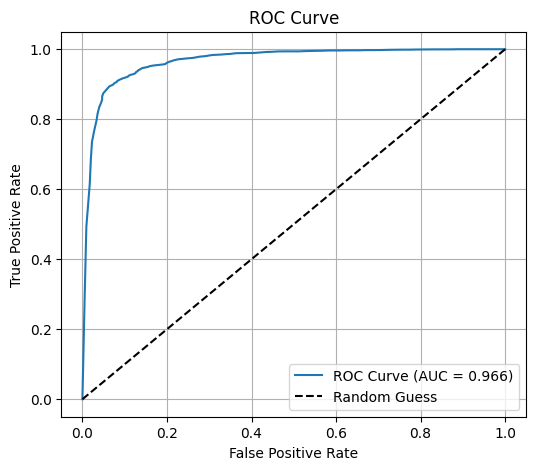

In [13]:
import matplotlib.pyplot as plt
y_prob = rf.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Try GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200, 300],
              'bootstrap': [True, False]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...bootstrap=True, n_estimators=50;, score=0.943 total time=   3.8s
[CV 2/5] END ...bootstrap=True, n_estimators=50;, score=0.935 total time=   3.5s
[CV 3/5] END ...bootstrap=True, n_estimators=50;, score=0.945 total time=   3.6s
[CV 4/5] END ...bootstrap=True, n_estimators=50;, score=0.940 total time=   4.2s
[CV 5/5] END ...bootstrap=True, n_estimators=50;, score=0.944 total time=   3.5s
[CV 1/5] END ..bootstrap=True, n_estimators=100;, score=0.946 total time=   7.9s
[CV 2/5] END ..bootstrap=True, n_estimators=100;, score=0.936 total time=   7.0s
[CV 3/5] END ..bootstrap=True, n_estimators=100;, score=0.948 total time=   7.7s
[CV 4/5] END ..bootstrap=True, n_estimators=100;, score=0.941 total time=   7.1s
[CV 5/5] END ..bootstrap=True, n_estimators=100;, score=0.945 total time=   7.9s
[CV 1/5] END ..bootstrap=True, n_estimators=200;, score=0.949 total time=  14.9s
[CV 2/5] END ..bootstrap=True, n_estimators=200;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=3)

In [18]:
print('Best parameters:', grid.best_params_)

best_grid = grid.best_estimator_
grid_prediction = best_grid.predict(x_test)
grid_prob = best_grid.predict_proba(x_test)[:, 1]

print(f'Accuracy: {accuracy_score(y_test, grid_prediction)}')
print(f'AUC: {roc_auc_score(y_test, grid_prob)}')
print(f'Classification Report:\n{classification_report(y_test, grid_prediction)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, grid_prediction)}')

Best parameters: {'bootstrap': False, 'n_estimators': 100}
Accuracy: 0.9458181818181818
AUC: 0.9673797894736842
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.83      0.76      0.79       750
         1.0       0.96      0.97      0.97      4750

    accuracy                           0.95      5500
   macro avg       0.90      0.87      0.88      5500
weighted avg       0.94      0.95      0.94      5500

Confusion Matrix:
[[ 571  179]
 [ 119 4631]]
